In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, TextBox

In [3]:
%matplotlib widget

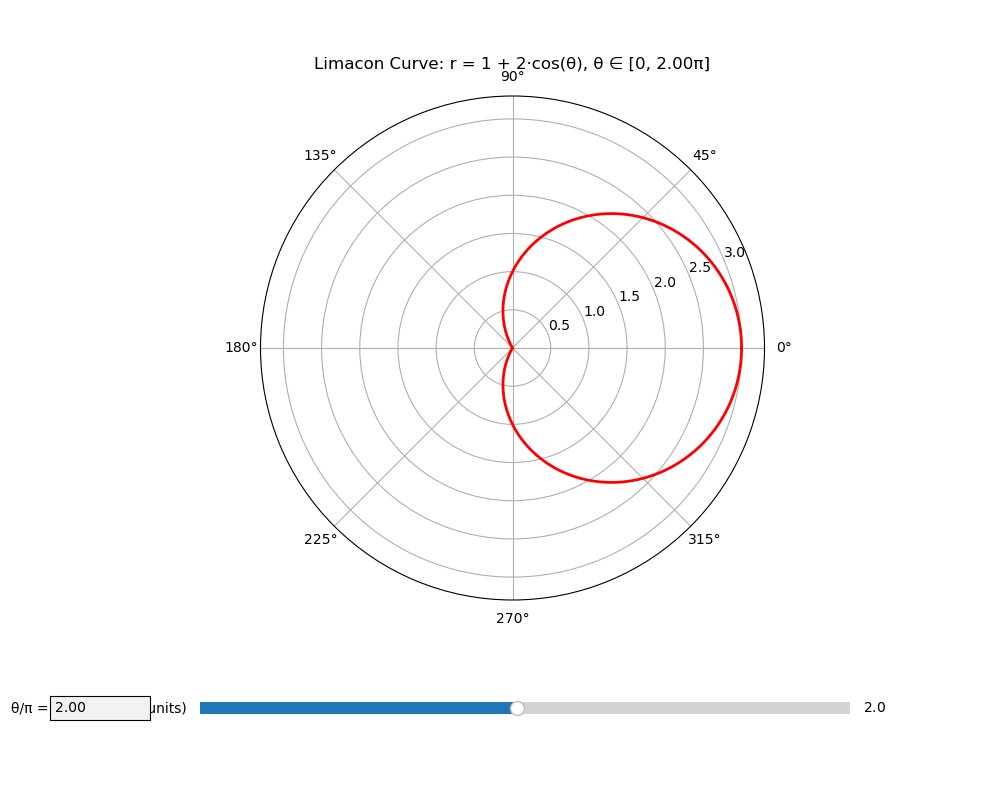

In [4]:
# Limacon parameters
a_limacon = 1
b_limacon = 2

# Create figure with polar axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='polar')
plt.subplots_adjust(bottom=0.25)

# Initial theta range
initial_max_theta = 2*np.pi
theta = np.linspace(0, initial_max_theta, 1000)

# Limacon function
def calculate_limacon(theta, a, b):
    return a + b * np.cos(theta)

# Initial plot
r = calculate_limacon(theta, a_limacon, b_limacon)
line, = ax.plot(theta, r, 'r-', linewidth=2)

# Set up the plot
ax.set_title(f'Limacon Curve: r = {a_limacon} + {b_limacon}·cos(θ), θ ∈ [0, {initial_max_theta/np.pi:.2f}π]', pad=20)
ax.grid(True)

# Max radius for consistent plot limits
max_r = a_limacon + b_limacon
ax.set_ylim(0, max_r * 1.1)

# Function to update the plot
def update_plot(max_theta):
    max_theta = float(max_theta)
    # Update theta range and recalculate r
    new_theta = np.linspace(0, max_theta, 1000)
    new_r = calculate_limacon(new_theta, a_limacon, b_limacon)
    
    # Update the line data
    line.set_data(new_theta, new_r)
    
    # Update title
    ax.set_title(f'Limacon Curve: r = {a_limacon} + {b_limacon}·cos(θ), θ ∈ [0, {max_theta/np.pi:.2f}π]', pad=20)
    
    fig.canvas.draw_idle()

# Create slider for max theta
ax_theta = plt.axes([0.2, 0.1, 0.65, 0.03])
slider_theta = Slider(
    ax_theta, 'Max θ (in π units)', 
    0.1, 4, 
    valinit=initial_max_theta/np.pi,
    valstep=0.05
)

# Update function for slider (converts to radians)
slider_theta.on_changed(lambda val: update_plot(val * np.pi))

# Create text box for max theta
ax_box = plt.axes([0.05, 0.1, 0.1, 0.03])
text_box = TextBox(ax_box, 'θ/π =', initial=f'{initial_max_theta/np.pi:.2f}')

# Update function for text box
def submit_theta(text):
    try:
        new_theta = float(text)
        new_theta = max(0.1, min(new_theta, 4))  # Limit between 0.1π and 4π
        slider_theta.set_val(new_theta)  # This will trigger the slider callback
    except ValueError:
        pass  # Ignore invalid input

text_box.on_submit(submit_theta)

plt.show()

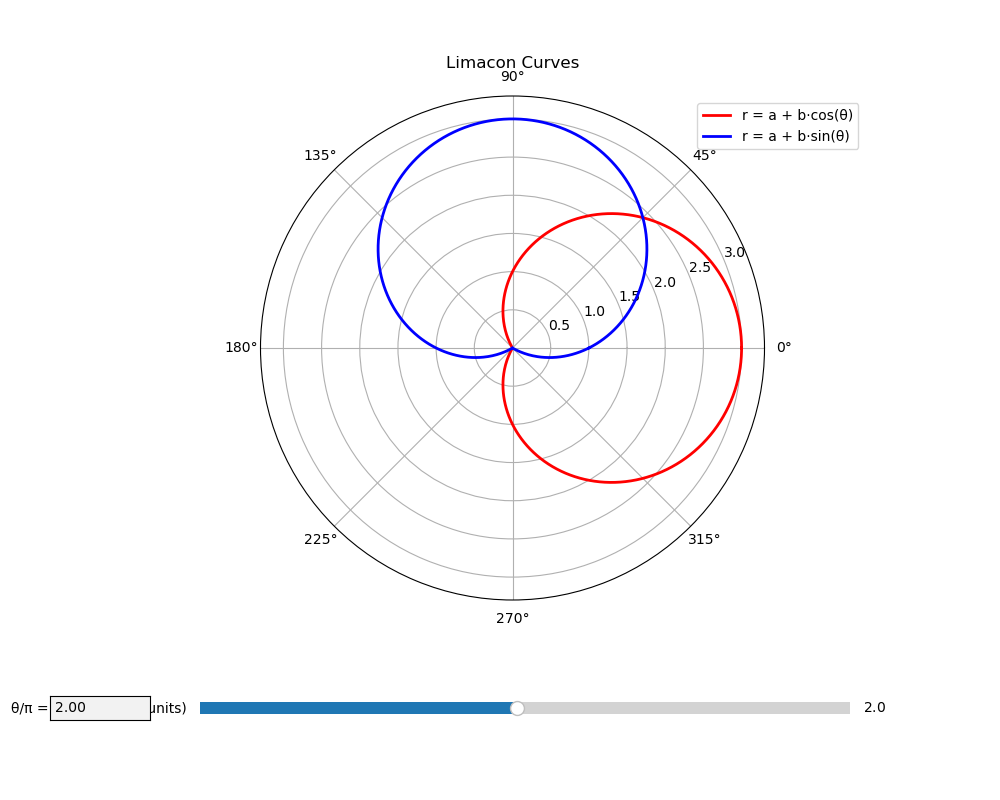

In [8]:
# Limacon parameters
a_limacon = 1
b_limacon = 2

# Create figure with polar axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='polar')
plt.subplots_adjust(bottom=0.25)

# Initial theta range
initial_max_theta = 2*np.pi
theta = np.linspace(0, initial_max_theta, 1000)

# Limacon functions
def calculate_limacon_cos(theta, a, b):
    return a + b * np.cos(theta)

def calculate_limacon_sin(theta, a, b):
    return a + b * np.sin(theta)

# Initial plots
r_cos = calculate_limacon_cos(theta, a_limacon, b_limacon)
r_sin = calculate_limacon_sin(theta, a_limacon, b_limacon)

line_cos, = ax.plot(theta, r_cos, 'r-', linewidth=2, label='r = a + b·cos(θ)')
line_sin, = ax.plot(theta, r_sin, 'b-', linewidth=2, label='r = a + b·sin(θ)')

# Set up the plot
ax.set_title('Limacon Curves', pad=20)
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

# Max radius for consistent plot limits
max_r = a_limacon + b_limacon
ax.set_ylim(0, max_r * 1.1)

# Function to update the plot
def update_plot(max_theta):
    max_theta = float(max_theta)
    # Update theta range and recalculate r
    new_theta = np.linspace(0, max_theta, 1000)
    new_r_cos = calculate_limacon_cos(new_theta, a_limacon, b_limacon)
    new_r_sin = calculate_limacon_sin(new_theta, a_limacon, b_limacon)
    
    # Update the line data
    line_cos.set_data(new_theta, new_r_cos)
    line_sin.set_data(new_theta, new_r_sin)
    
    # Update title
    ax.set_title('Limacon Curves')
    
    fig.canvas.draw_idle()

# Create slider for max theta
ax_theta = plt.axes([0.2, 0.1, 0.65, 0.03])
slider_theta = Slider(ax_theta, 'Max θ (in π units)', 0.1, 4, valinit=initial_max_theta/np.pi, valstep=0.05)

# Update function for slider (converts to radians)
slider_theta.on_changed(lambda val: update_plot(val * np.pi))

# Create text box for max theta
ax_box = plt.axes([0.05, 0.1, 0.1, 0.03])
text_box = TextBox(ax_box, 'θ/π =', initial=f'{initial_max_theta/np.pi:.2f}')

# Update function for text box
def submit_theta(text):
    try:
        new_theta = float(text)
        new_theta = max(0.1, min(new_theta, 4))  # Limit between 0.1π and 4π
        slider_theta.set_val(new_theta)  # This will trigger the slider callback
    except ValueError:
        pass  # Ignore invalid input

text_box.on_submit(submit_theta)

plt.show()

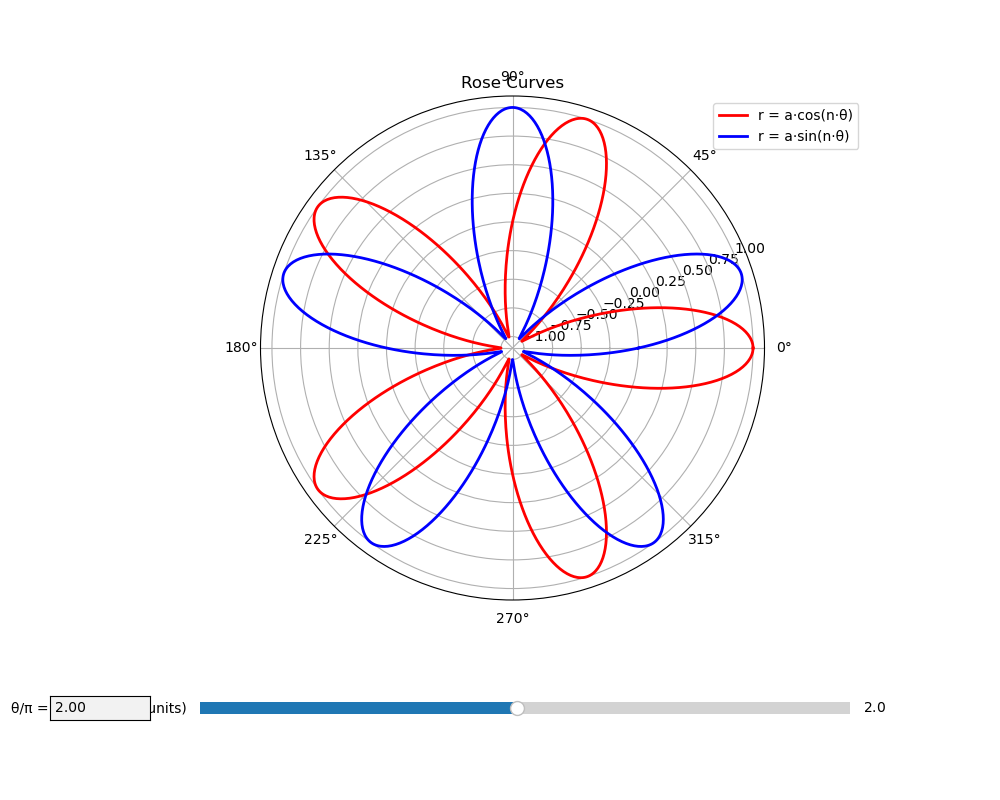

In [12]:
# Rose curve parameters
a_rose = 1
n_rose = 5

# Create figure with polar axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='polar')
plt.subplots_adjust(bottom=0.25)

# Initial theta range
initial_max_theta = 2*np.pi
theta = np.linspace(0, initial_max_theta, 1000)

# Rose curve functions
def calculate_rose_cos(theta, a, n):
    return a * np.cos(n * theta)

def calculate_rose_sin(theta, a, n):
    return a * np.sin(n * theta)

# Initial plots
r_cos = calculate_rose_cos(theta, a_rose, n_rose)
r_sin = calculate_rose_sin(theta, a_rose, n_rose)

line_cos, = ax.plot(theta, r_cos, 'r-', linewidth=2, label='r = a·cos(n·θ)')
line_sin, = ax.plot(theta, r_sin, 'b-', linewidth=2, label='r = a·sin(n·θ)')

# Set up the plot
ax.set_title('Rose Curves')
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

# Function to update the plot
def update_plot(max_theta):
    max_theta = float(max_theta)
    # Update theta range and recalculate r
    new_theta = np.linspace(0, max_theta, 1000)
    new_r_cos = calculate_rose_cos(new_theta, a_rose, n_rose)
    new_r_sin = calculate_rose_sin(new_theta, a_rose, n_rose)
    
    # Update the line data
    line_cos.set_data(new_theta, new_r_cos)
    line_sin.set_data(new_theta, new_r_sin)
    
    # Update title
    ax.set_title(f'Rose Curves')
    
    fig.canvas.draw_idle()

# Create slider for max theta
ax_theta = plt.axes([0.2, 0.1, 0.65, 0.03])
slider_theta = Slider(
    ax_theta, 'Max θ (in π units)', 0.1, 4, valinit=initial_max_theta/np.pi, valstep=0.05)

# Update function for slider (converts to radians)
slider_theta.on_changed(lambda val: update_plot(val * np.pi))

# Create text box for max theta
ax_box = plt.axes([0.05, 0.1, 0.1, 0.03])
text_box = TextBox(ax_box, 'θ/π =', initial=f'{initial_max_theta/np.pi:.2f}')

# Update function for text box
def submit_theta(text):
    try:
        new_theta = float(text)
        new_theta = max(0.1, min(new_theta, 4))  # Limit between 0.1π and 4π
        slider_theta.set_val(new_theta)  # This will trigger the slider callback
    except ValueError:
        pass  # Ignore invalid input

text_box.on_submit(submit_theta)

plt.show()

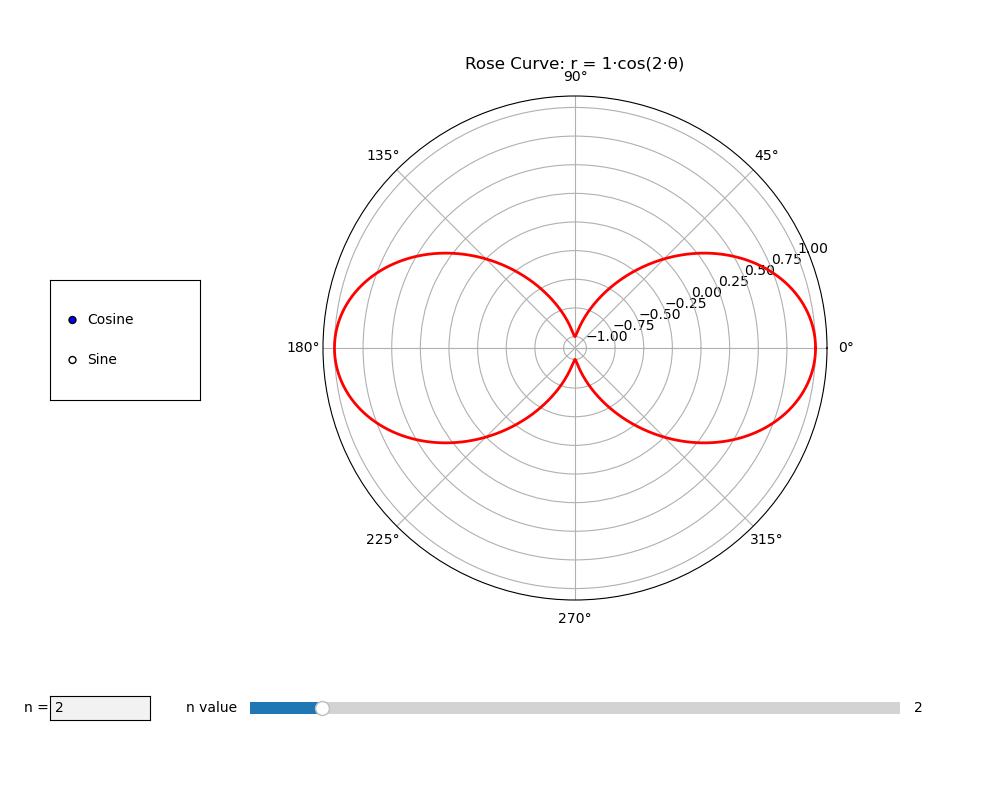

In [13]:
# Rose curve parameters
a_rose = 1

# Create figure with polar axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='polar')
plt.subplots_adjust(left=0.25, bottom=0.25)

# Full theta range for complete visualization
theta = np.linspace(0, 2*np.pi, 1000)

# Rose curve function
def calculate_rose(theta, a, n, use_cos=True):
    if use_cos:
        return a * np.cos(n * theta)
    else:
        return a * np.sin(n * theta)

# Initial values
initial_n = 2
# Store plot state in a dictionary to avoid using nonlocal
plot_state = {'use_cosine': True, 'n_value': initial_n}

# Initial plot
r = calculate_rose(theta, a_rose, initial_n, plot_state['use_cosine'])
line, = ax.plot(theta, r, 'r-', linewidth=2)

# Set up the plot
ax.set_title(f'Rose Curve: r = {a_rose}·cos({initial_n}·θ)', pad=20)
ax.grid(True)

# Function to update the plot
def update_plot(n=None, func_type=None):
    if n is not None:
        plot_state['n_value'] = int(n)
    
    if func_type is not None:
        plot_state['use_cosine'] = (func_type == 'Cosine')
    
    # Recalculate r
    new_r = calculate_rose(theta, a_rose, plot_state['n_value'], plot_state['use_cosine'])
    
    # Update the line data
    line.set_data(theta, new_r)
    
    # Update title with correct function
    func_name = 'cos' if plot_state['use_cosine'] else 'sin'
    ax.set_title(f'Rose Curve: r = {a_rose}·{func_name}({plot_state["n_value"]}·θ)', pad=20)
    
    fig.canvas.draw_idle()

# Create slider for n
ax_n = plt.axes([0.25, 0.1, 0.65, 0.03])
slider_n = Slider(
    ax_n, 'n value', 
    1, 10, 
    valinit=initial_n,
    valstep=1
)

# Update function for slider
slider_n.on_changed(update_plot)

# Create text box for n
ax_box = plt.axes([0.05, 0.1, 0.1, 0.03])
text_box = TextBox(ax_box, 'n =', initial=f'{initial_n}')

# Update function for text box
def submit_n(text):
    try:
        new_n = int(text)
        new_n = max(1, min(new_n, 10))  # Limit between 1 and 10
        slider_n.set_val(new_n)  # This will trigger the slider callback
    except ValueError:
        pass  # Ignore invalid input

text_box.on_submit(submit_n)

# Add radio buttons to switch between cosine and sine
ax_radio = plt.axes([0.05, 0.5, 0.15, 0.15])
radio = RadioButtons(ax_radio, ('Cosine', 'Sine'), active=0)
radio.on_clicked(lambda label: update_plot(func_type=label))

plt.show()